# Exploratory Data Analysis: Iris Flower Data Set

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris = pd.concat([iris.data, iris.target], axis=1)
iris.rename(columns={"target": "Species"}, inplace=True)

m = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
iris['Species'] = iris['Species'].map(m)
display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Visualize correlogram / pair plot

<Figure size 720x720 with 0 Axes>

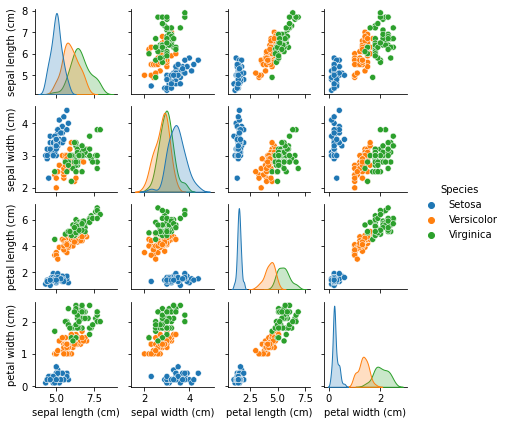

In [2]:
plt.figure(figsize=(10,10))
sns.pairplot(iris, hue='Species', height=1.5)
plt.show()

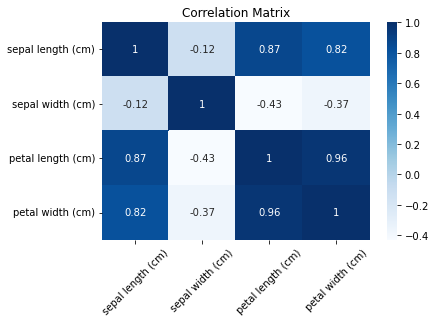

In [3]:
corr_matrix = iris.iloc[:,:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

## Visualize the distributions of each feature

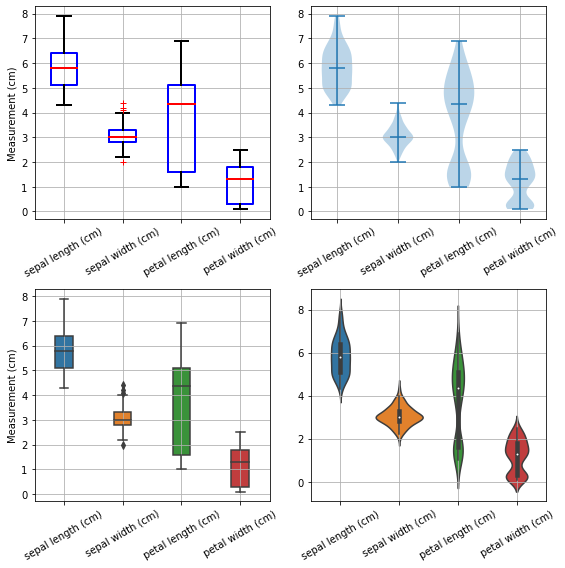

In [4]:
plt.figure(figsize=(8,8))
angle=30

# Using matplotlib's boxplot
plt.subplot(221)
plt.boxplot(iris.iloc[:,:4].to_numpy(), 
            boxprops=dict(linewidth=2, color='b'),
            medianprops=dict(linewidth=2, color='r'),
            whiskerprops=dict(linewidth=2, color='k'),
            capprops=dict(linewidth=2, color='k'),
            flierprops=dict(marker='+', markeredgecolor='r'))
plt.ylabel('Measurement (cm)')
plt.xticks(np.arange(4)+1,
           labels=iris.columns.values[:4],
           rotation=angle)
plt.grid()

# Using matplotlib's violinplot
plt.subplot(222)
plt.violinplot(iris.iloc[:,:4].to_numpy(),
               showmeans=False,
               showmedians=True)
plt.xticks(np.arange(4)+1,
           labels=iris.columns.values[:4],
           rotation=angle)
plt.grid()

# Using seaborn's boxplot
plt.subplot(223)
sns.boxplot(data=iris, width=0.3)
plt.xticks(rotation=angle)
plt.ylabel('Measurement (cm)')
plt.grid()

# Using seaborn's violinplot
plt.subplot(224)
sns.violinplot(data=iris)
plt.xticks(rotation=angle)
plt.grid()
plt.tight_layout()
plt.show()

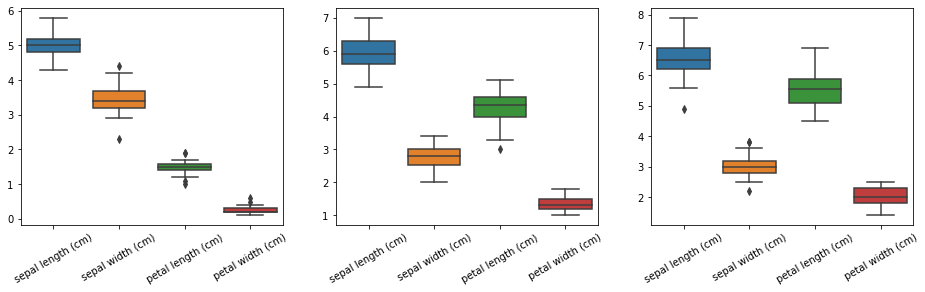

In [5]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(data=iris.iloc[(iris.Species=='Setosa').values,:4])
plt.xticks(rotation=angle)
plt.subplot(132)
sns.boxplot(data=iris.iloc[(iris.Species=='Versicolor').values,:4])
plt.xticks(rotation=angle)
plt.subplot(133)
sns.boxplot(data=iris.iloc[(iris.Species=='Virginica').values,:4])
plt.xticks(rotation=angle)
plt.show()

,Species,Features,Measurements
0,Setosa,sepal length (cm),5.1
1,Setosa,sepal length (cm),4.9
2,Setosa,sepal length (cm),4.7
3,Setosa,sepal length (cm),4.6
4,Setosa,sepal length (cm),5.0
...,...,...,...
595,Virginica,petal width (cm),2.3
596,Virginica,petal width (cm),1.9
597,Virginica,petal width (cm),2.0
598,Virginica,petal width (cm),2.3


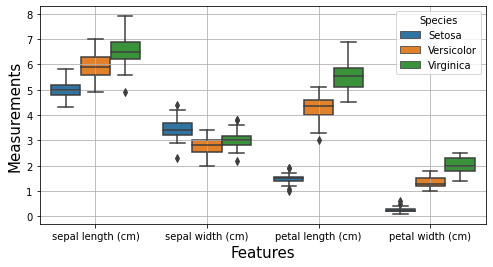

In [8]:
melted_iris = pd.melt(iris, id_vars=["Species"], value_vars=iris.columns.values[:4])
melted_iris.columns = ['Species', 'Features', 'Measurements']
display(melted_iris)
plt.figure(figsize=(8,4))
sns.boxplot(data=melted_iris, width=0.8,
            x="Features", y="Measurements", hue='Species')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

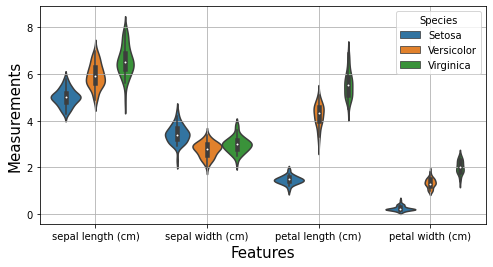

In [7]:
plt.figure(figsize=(8,4))
sns.violinplot(data=melted_iris, width=0.8,
            x="Features", y="Measurements", hue='Species')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()